[![DOI](https://zenodo.org/badge/940091341.svg)](https://doi.org/10.5281/zenodo.14939868) <a href="https://www.globh2e.org.au/"><img src="https://img.shields.io/badge/ARC:Funding%20number-IC200100023-blue.svg"/></a>

# **Computational planetary boundaries based prospective life cycle assessment**
<!-- **<div style="text-align: left; font-size: 19px;"> Prospective life cycle assessment data generation**</div> -->

<div style="text-align: left; font-size: 16px;">Michaël Lejeune<sup>a,b</sup>, Sami Kara<sup>a,b</sup>, Michael Zwicky Hauschild<sup>c,d</sup>, Sareh Sharabifarahni<sup>a</sup>, Rahman Daiyan<sup>b,e</sup></div><br>

<div style="text-align: left; font-size: 13px;"><sup>a</sup>Sustainability in Manufacturing and Life Cycle Engineering Research Group, School of Mechanical and Manufacturing Engineering, the University of New South Wales, 2052, Sydney, Australia</div>

<div style="text-align: left; font-size: 13px;">
<sup>b</sup>Australian Research Council Training Centre for the Global Hydrogen Economy (GlobH2e), the University of New South Wales, 2052, Sydney, Australia</div>

<div style="text-align: left; font-size: 13px;">
<sup>c</sup>Centre for Absolute Sustainability, Technical University of Denmark, Kgs, Lyngby, Denmark</div>

<div style="text-align: left; font-size: 13px;">
<sup>d</sup>Division for Quantitative Sustainability Assessment (QSA), Department of Environmental and Resource Engineering, Technical University of Denmark, Kgs, Lyngby, Denmark</div>

<div style="text-align: left; font-size: 13px;">
<sup>e</sup>School of Minerals and Energy Engineering, The University of New South Wales, Sydney 2052, Australia</div><br>

<div style="text-align: left; font-size: 13px;"> Code developer and maintainer:<a href="mailto:m.lejeune@unsw.edu.au"> Michaël Lejeune</div></a><br>


In [1]:
using lce, PyPlot,XLSX
using Statistics,Distributions, KernelDensity,LinearAlgebra
using DataFrames, PyPlot,PyCall
include("Utils/1_00_utils.jl")


matformat

In [2]:
PyPlot.svg(true)
tkr=pyimport("matplotlib.ticker")
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
fm=pyimport("matplotlib.font_manager")


PyObject <module 'matplotlib.font_manager' from '/Users/mickael/anaconda3/envs/ab/lib/python3.11/site-packages/matplotlib/font_manager.py'>

# **1. Background**

In life cycle impact assessment (LCIA) the aim is to develop characterisation factors which we will denote mathematically by $Q_{ze}$ as it would belong to a Matrix $\boldsymbol{Q}$ of $z$ impact categories rows per $e$ elmentary flows colums. $Q_{ze}$ aims to characterise the impact caused on the state of a biophysical system $z$ by the emission/extraction of elementary flows denoted $g_e$. An elementary flow $g_e$ is a unique specie/substance/material/resource that is either emitted/extracted to/from biosphere due to activities in the technosphere. In LCA, the goal is first to obtain the full list of elementary flows interacting with a product system. The sum of all characterised elementary flows gives an impact score in absolute terms that represents the change to a specific environmental category due to the emission/extraction of elementary flows (as done in Equation 14).

$$
\Delta X_z = \sum_e Q_{ze} g_e =\sum_e\sum_jQ_{ze} B_{ej} s_j = \sum_e\sum_j\sum_i Q_{ze} B_{ej} A_{ij}^{-1} f_i \tag{14}
$$

It is sometimes (as done in this study) to define the process intensity factors $\Lambda_{zj}$.

$$
\Delta X_z = \sum_j \Lambda_{zj} s_j
$$

> <span style="color:rgb(0, 112, 110); font-weight: bold;">Summary of terms</span>
> - $\Delta X_z$ is the change of state of a biophysical system $z$.
> - $Q_{ze}$ is the characterisation factor of an elementary flow $e$ for a biophysical system $z$.
> - $B_{ej}$ is the biosphere intervention (emission/extraction) of an elementary flow $e$ per process $j$.
> - $A_{ij}$ is the technosphere intervention of a reference flow (product) $i$ per process $j$.
> - $\Lambda_{zj}$ is the impact of a process $j$ on a biophysical system $z$.
> - $g_e$ is is the biosphere intervention (emission/extraction) of an elementary flow $e$.
> - $s_j$ is scale of a process $j$ in the technosphere.
> - $f_i$ is the reference flow (demend for a product) of a process $i$ in the technosphere.
> - $z$ is the index of a biophysical system.
> - $e$ is the index of an elementary flow.
> - $j$ is the index of a process.
> - $i$ is the index of a product.

# **2. Computations**

In [3]:
initProject("natcom")


┌ Info: Project natcom -> model:ecoinvent_3.9.1 RCP:0.0 SSP:0 year:0 loaded
└ @ lce /Users/mickael/Library/CloudStorage/OneDrive-UNSW/Research/Publications/Journal articles/1_Natcoms/Submission/code/lce/src/lce.jl:781


Project              Model          RCP      SSP      Year   Method        
──────────────────── ────────────── ──────── ──────── ────── ──────────────
natcom               ecoinvent_3.9.1 0.0      0             0 Planetary boundaries

natcom: ecoinvent_3.9.1 0.0 0 0 Planetary boundaries


In [4]:
𝐀=Technosphere!().Matrix


23559×23559 SparseMatrixCSC{Float64, Int64} with 291159 stored entries:
⎡⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡏⢸⎤
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡯⢼⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡧⢼⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣯⢼⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣧⢼⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡧⢸⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣽⣷⣺⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣹⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣗⢸⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣇⢼⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⡿⢾⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣧⢸⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡧⢸⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⢼⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣯⡯⢹⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⢼⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣟⢻⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡏⢹⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠻⢯⡗⠊⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠛⢯⎦

In [5]:
𝐁=Biosphere!().Matrix


4709×23559 SparseMatrixCSC{Float64, Int64} with 437621 stored entries:
⎡⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣿⎤
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎢⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⎥
⎣⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⎦

In [6]:
𝐐=Characterisation!().Matrix


10×4709 SparseMatrixCSC{Float64, Int64} with 683 stored entries:
⎡⡿⡼⠯⠉⠭⠿⢈⡏⡇⢹⠿⠿⠤⢿⡸⠿⠅⠄⠸⠏⡿⠌⠿⠍⢨⠸⠏⢯⠇⠽⡼⠯⠯⠠⡿⢤⡇⢿⠏⢄⎤
⎣⣒⣖⣖⣒⣂⣐⣚⣒⣚⣰⣒⣕⣀⣚⡬⣂⣒⣂⣒⣐⣂⣓⣠⣒⣲⣂⣒⣚⣘⣒⣐⣲⣁⣒⣒⣐⣀⣚⣒⣂⎦

In [7]:
hydro=getAct("electricity production, hydro, run-of-river","RoW")


HTML{String}("<table style=\"border-collapse: collapse; width: 100%; font-family: Arial, sans-serif; font-size: 12px;\">\n    <thead>\n        <!-- Top heading row with dark grey background and white bold font -->\n        <tr style=\"background-color: #415a77; font-weight: bold; color: White;\">\n            <td rowspan=\"2\" style=\"border: 1px solid #ddd; padding: 7px; text-align: center;\">\n                Activity key: <br><br>  3336\n            </td>\n            <td style=\"border: 1px solid #ddd; padding: 7px; text-align: center;\">\n                Activity name\n            </td>\n            <td colspan=\"3\" style=\"border: 1px solid #ddd; padding: 7px; text-align: center;\">\n                electricity production, hydro, run-of-river, RoW<br>\n            </td>\n        </tr>\n        <tr style=\"background-color: #415a77; font-weight: bold; color: white;\">\n            <td style=\"border: 1px solid #ddd; padding: 7px; text-align: center;\">\n                Reference flow\n            </td>\n            <td colspan=\"3\" style=\"border: 1px solid #ddd; padding: 7px; text-align: center;\">\n                1.0 kilowatt hour of electricity, high voltage\n            </td>\n        </tr>\n        <td colspan=\"5\" style=\"border: 1px solid #ddd; padding: 7px; background-color: #8d99ae; font-weight: bold; color: White; text-align: center;\">Technosphere Exchanges</td>\n        <!-- Column names row with centered text -->\n        \n    </thead>\n    <tbody>\n        <tr style=\"font-weight: bold;background-color: #8d99ae; padding: 7px; color: White; text-align: center\">\n            <td style=\"border: 1px solid #ddd; background-color: #8d99ae; font-weight: bold; color: White; text-align: center;\">Exchange keys</td>\n\n            <td style=\"border: 1px solid #ddd;\">Reference flow</td>\n            <td style=\"border: 1px solid #ddd;\">Activity</td>\n            <td style=\"border: 1px solid #ddd;\">Amount</td>\n            <td style=\"border: 1px solid #ddd;\">Unit</td>\n        </tr>\n    <tr style=\"font-size: 11px; padding: 3px;\">\n        <td style=\"border: 1px solid #ddd; \">9312</td>\n        <td style=\"border: 1px solid #ddd;\">hydropower plant, run-of-river</td>\n        <td style=\"border: 1px solid #ddd;\">market for hydropower plant, run-of-river - GLO</td>\n        <td style=\"border: 1px solid #ddd;text-align: right\">8.07284939292173e-13</td>\n        <td style=\"border: 1px solid #ddd;text-align: left\">unit</td>\n    </tr>\n    <tr style=\"font-size: 11px; padding: 3px;\">\n        <td style=\"border: 1px solid #ddd; \">14275</td>\n        <td style=\"border: 1px solid #ddd;\">waste mineral oil</td>\n        <td style=\"border: 1px solid #ddd;\">market for waste mineral oil - RoW</td>\n        <td style=\"border: 1px solid #ddd;text-align: right\">-7.56e-6</td>\n        <td style=\"border: 1px solid #ddd;text-align: left\">kilogram</td>\n    </tr>\n    <tr style=\"font-size: 11px; padding: 3px;\">\n        <td style=\"border: 1px solid #ddd; \">17918</td>\n        <td style=\"border: 1px solid #ddd;\">lubricating oil</td>\n        <td style=\"border: 1px solid #ddd;\">market for lubricating oil - RoW</td>\n        <td style=\"border: 1px solid #ddd;text-align: right\">7.56e-6</td>\n        <td style=\"border: 1px solid #ddd;text-align: left\">kilogram</td>\n    </tr>\n<table style=\"border-collapse: collapse; width: 100%; font-family: Arial, sans-serif; font-size: 12px;\">\n    <thead>    <tr style=\"font-weight: bold;\">\n        <td colspan=\"5\" style=\"border: 1px solid #ddd; padding: 7px; background-color: #344e41; color: White; text-align: center;\">Biosphere Exchanges</td>\n    </tr>\n<tr style=\"font-weight: bold; background-color: #588157; color: White; text-align: center\">\n\n    <td style=\"border: 1px solid #ddd; padding: 7px; font-weight: bold; color: White; text-align: center;\">Exchange keys</td> \n    <td style=\"border: 1px solid #ddd; padding: 7px;width:70px\">Environmen

Reference flow               Activity                     Amount       Unit     Location         Key             
──────────────────────────── ──────────────────────────── ──────────── ──────── ──────────────── ────────────────
electricity, high voltage    electricity production, hydro, run-of-river          1.0 kilowatt hour RoW              3336            

In [8]:
𝐟=zeros(𝐀.m)
𝐟[hydro.key]=1


1

In [9]:
𝐬=(𝐀\𝐟);


In [ ]:
g=𝐁𝐬


In [10]:
𝐡 = 𝐐 * 𝐁 * diagm(𝐬)


10×23559 Matrix{Float64}:
 7.21858e-25   0.0          0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 5.49566e-23   0.0          0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.68207e-25  -1.89141e-25  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.31433e-26   0.0          0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 3.91646e-22   0.0          0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0           0.0          0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0           0.0          0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0           0.0          0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0           0.0          0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 4.14744e-25   0.0          0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [11]:
𝐡₁ = lca(hydro)


Row,Exchanges,Climate change-Energy imbalance,Climate change-CO2 Concentration,Ocean acidification-Carbonate ion concentration,Atmospheric aerosol loading-Aerosol Optical Depth (AOD),Freshwater use-Global,Biogeochemical flows-P,Biogeochemical flows-N,Stratospheric ozone depletion-Stratospheric O3 concentration,Land-system change-Global,Biosphere Integrity-Change in biosphere integrity
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,"market for hydropower plant, run-of-river",1.5338e-15,1.15476e-13,3.51583e-16,6.768e-17,3.7961e-14,3.87418e-14,1.67901e-14,4.81109e-19,9.23259e-18,1.11499e-15
2,market for waste mineral oil,4.80309e-18,3.65966e-16,1.11836e-18,2.86475e-21,4.30192e-18,3.20955e-17,3.82607e-19,7.83032e-23,1.70705e-22,2.76913e-18
3,market for lubricating oil,3.96952e-18,2.93087e-16,8.96003e-19,7.40308e-20,8.44371e-17,9.6643e-17,2.42057e-17,3.75116e-21,1.74417e-20,3.11228e-18
4,"electricity production, hydro, run-of-river",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.38113e-15
5,TOTAL,1.54257e-15,1.16135e-13,3.53598e-16,6.77569e-17,3.80497e-14,3.88705e-14,1.68147e-14,4.84938e-19,9.2502e-18,4.502e-15


# **3. Prospective life cycle assessment**

In [12]:
𝐋(a,p)=lca(a(p),project=p)[end,2]
𝐋(a,p,cat=2)=lca(a(p),project=p)[end,cat]
𝐋i(a,p)=Array(lca(a(p),project=p)[end,2:end])
𝐋x(a,m,p)=Array(lca(a(p,m),project=p)[end,2:end]);
𝐋i(a,p)=Array(lca(a(p),project=p)[end,2:end])
𝐋x(a,m,p)=Array(lca(a(p,m),project=p)[end,2:end]);


In [13]:
models=["REMIND-SSP1-Pkbudg500","REMIND-SSP2-Pkbudg500","REMIND-SSP5-Pkbudg500","IMAGE-SSP2-1.9"]


4-element Vector{String}:
 "REMIND-SSP1-Pkbudg500"
 "REMIND-SSP2-Pkbudg500"
 "REMIND-SSP5-Pkbudg500"
 "IMAGE-SSP2-1.9"

In [14]:
𝐏=[initProject("natcom_demo",model=x.first,RCP=1.9,SSP=x.second,year=y) for x ∈ ["REMIND"=>1
                                                                                "REMIND"=>2
                                                                                "REMIND"=>5
                                                                                # "IMAGE"=>2
                                                                                # "TIAM-UCL"=>2 #this one is not very good
                                                                                ],
                                                                            y ∈ 2025:5:2050]
                                                                           

┌ Info: Project natcom_demo -> model:REMIND RCP:1.9 SSP:1 year:2025 loaded
└ @ lce /Users/mickael/Library/CloudStorage/OneDrive-UNSW/Research/Publications/Journal articles/1_Natcoms/Submission/code/lce/src/lce.jl:781
┌ Info: Project natcom_demo -> model:REMIND RCP:1.9 SSP:2 year:2025 loaded
└ @ lce /Users/mickael/Library/CloudStorage/OneDrive-UNSW/Research/Publications/Journal articles/1_Natcoms/Submission/code/lce/src/lce.jl:781
┌ Info: Project natcom_demo -> model:REMIND RCP:1.9 SSP:5 year:2025 loaded
└ @ lce /Users/mickael/Library/CloudStorage/OneDrive-UNSW/Research/Publications/Journal articles/1_Natcoms/Submission/code/lce/src/lce.jl:781
┌ Info: Project natcom_demo -> model:REMIND RCP:1.9 SSP:1 year:2030 loaded
└ @ lce /Users/mickael/Library/CloudStorage/OneDrive-UNSW/Research/Publications/Journal articles/1_Natcoms/Submission/code/lce/src/lce.jl:781
┌ Info: Project natcom_demo -> model:REMIND RCP:1.9 SSP:2 year:2030 loaded
└ @ lce /Users/mickael/Library/CloudStorage/OneDrive-UNSW

Project              Model          RCP      SSP      Year   Method        
──────────────────── ────────────── ──────── ──────── ────── ──────────────
natcom_demo          REMIND         1.9      1          2025 Planetary boundaries

Project              Model          RCP      SSP      Year   Method        
──────────────────── ────────────── ──────── ──────── ────── ──────────────
natcom_demo          REMIND         1.9      2          2025 Planetary boundaries

Project              Model          RCP      SSP      Year   Method        
──────────────────── ────────────── ──────── ──────── ────── ──────────────
natcom_demo          REMIND         1.9      5          2025 Planetary boundaries

Project              Model          RCP      SSP      Year   Method        
──────────────────── ────────────── ──────── ──────── ────── ──────────────
natcom_demo          REMIND         1.9      1          2030 Planetary boundaries

Project              Model          RCP      SSP      Year  

In [51]:
#biomass
wood_elect(p)=getAct("electricity production, wood, future","GLO",project=p);

#gas
gas_fired(p)=getAct("electricity production, at natural gas-fired combined cycle power plant, post, pipeline 200km, storage 1000m","World",project=p);

gas_fired_ccs_post(p)=getAct("electricity production, at natural gas-fired combined cycle power plant, post, pipeline 200km, storage 1000m","World",project=p);

gas_turbine(p)=getAct("electricity production, natural gas, 10MW","CH",project=p)

# Hard coal
hard_coal(p)=getAct("electricity production, hard coal","RoW",project=p)
hard_coal_supcrit(p)=getAct("electricity production, hard coal, supercritical","ZA",project=p);

# Oil
oil(p)=getAct("electricity production, oil","RoW",project=p);

# lignite
lignite_fired(p)=getAct("electricity production, at lignite-fired IGCC power plant","World",project=p);
lignite(p)=getAct("electricity production, lignite","RoW",project=p);

#peat
peat(p)=getAct("electricity production, peat","RoW",project=p);

#hydrogen
hydrogen_fired(p)=getAct("electricity production, from hydrogen-fired one gigawatt gas turbine","World",project=p);

#geothermal
geothermal(p)=getAct("electricity production, deep geothermal","RoW",project=p);

# hydro
hydrof(p)=getAct("electricity production, hydro, run-of-river","RoW",project=p)
# hydro_non_alpine(p)=getAct("electricity production, hydro, reservoir, non-alpine region","RoW",project=p);

## nuclear
nuclear_pressure(p)=getAct("electricity production, nuclear, pressure water reactor","RoW",project=p)
nuclear_boiling(p)=getAct("electricity production, nuclear, boiling water reactor","RoW",project=p)
nuclear_pressure_heavy(p)=getAct("electricity production, nuclear, pressure water reactor, heavy water moderated","RoW",project=p);

# wind
wind(p)=getAct("electricity production, wind, >3MW turbine, onshore","RoW",project=p);

# solar
solar_thermal(p)=getAct("electricity production, solar thermal parabolic trough, 50 MW","RoW",project=p)
solar_pv(p)=getAct("electricity production, photovoltaic, 570kWp open ground installation, multi-Si","RoW",project=p);


Now we can plot all results for all the electricity production sources

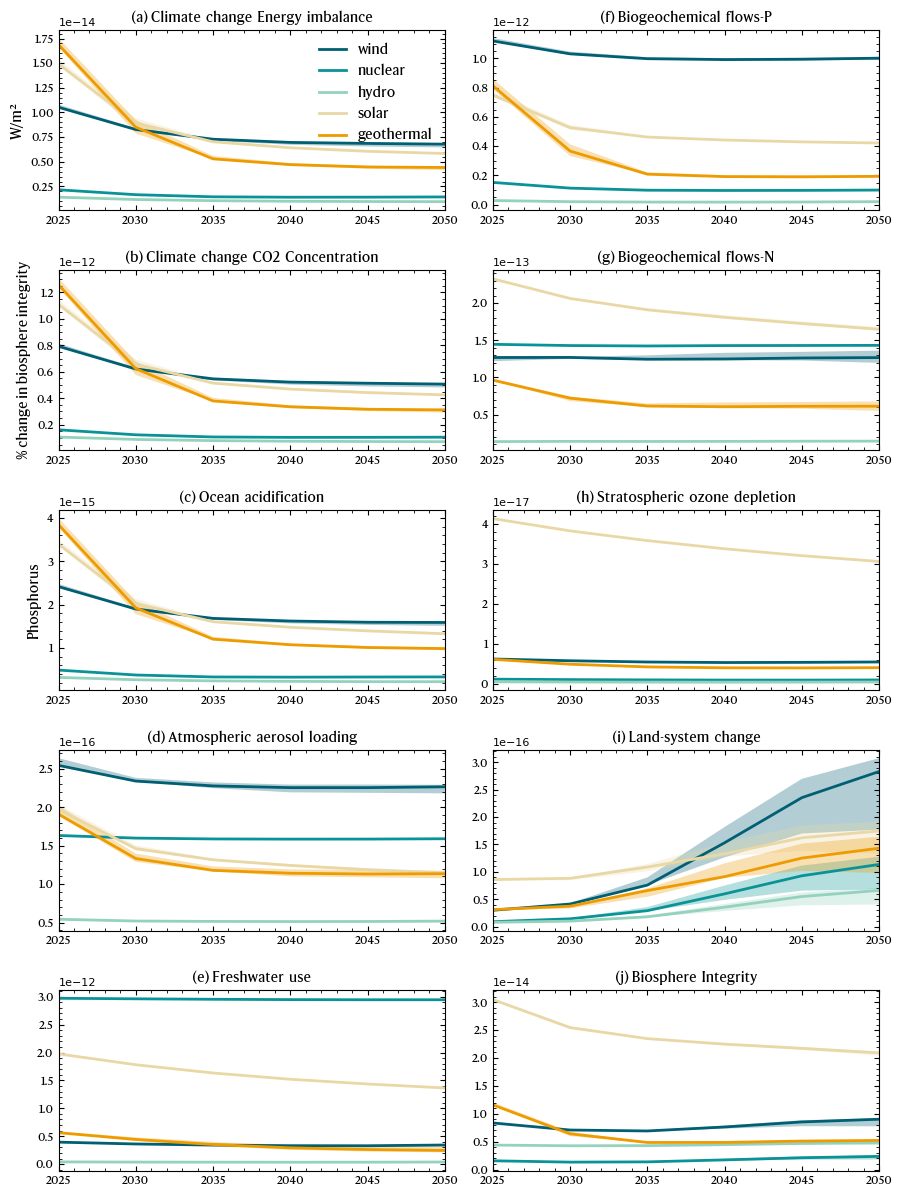

In [79]:
pal = ["#005f73","#0a9396","#94d2bd","#e9d8a6","#ee9b00","#ca6702","#bb3e03","#ae2012","#9b2226"]
rcParams["ytick.right"] = true
rcParams["xtick.top"] = true
rcParams["xtick.bottom"] = true
rcParams["ytick.direction"] = "in"
rcParams["ytick.minor.visible"] = true
rcParams["xtick.direction"] = "in"
rcParams["xtick.minor.visible"] = true

rcParams["axes.prop_cycle"] = plt.cycler("color", pal)

fig, axs = plt.subplots(5,2,figsize=(9, 12))
letters = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)", "(h)", "(i)","(j)"]
for i in 1:10
    for (j,k) in zip([wind,nuclear_pressure,hydrof,solar_pv,geothermal],["wind","nuclear","hydro","solar","geothermal"])
        q05=mapslices(x -> quantile(x,0.05),𝐋.(j,𝐏,i+1)',dims=2)|>vec
        q50=mapslices(x -> quantile(x,0.5),𝐋.(j,𝐏,i+1)',dims=2)|>vec
        q95=mapslices(x -> quantile(x,0.95),𝐋.(j,𝐏,i+1)',dims=2)|>vec
        axs[i].plot(2025:5:2050,q50,label=k,linewidth=2)
        axs[i].fill_between(2025:5:2050,y1=q05,y2=q95,alpha=0.3,linewidth=0)
        axs[i].set_title(letters[i]*" "*catnames[i], fontproperties=font_prop_labels)
        axs[i].set_xlim(2025, 2050)
    end
end
### Styling
axs[1].set_ylabel("W/m²",fontproperties=font_prop_labels)
axs[2].set_ylabel("% change in biosphere integrity",fontproperties=font_prop_labels)
axs[3].set_ylabel("Phosphorus",fontproperties=font_prop_labels)
for ax in axs
        for ticklabel in ax.get_xticklabels()
            ticklabel.set_fontproperties(font_prop_ticks)
        end
        for ticklabel in ax.get_yticklabels()
            ticklabel.set_fontproperties(font_prop_ticks)
        end
    end
fig.tight_layout()
axs[1].legend(loc="upper right", frameon=false, prop=font_prop_labels)#, bbox_to_anchor=(-0.12, -0.15), ncol=3
plt.savefig(respath*"electricity comparison.svg",transparent=true,bbox_inches="tight")
plt.savefig(respath*"electricity comparison.png",transparent=true,bbox_inches="tight",dpi=800)
display(plt.gcf())
plt.close("all")


In [18]:
# saveProject.(𝐏)


# **Background system data aggregation**

## **1.1 Aggregation**

In [19]:
function aggregation(processes::Vector{Pair{String, String}})
    Techno=Technosphere!.(𝐏)
    Bio= Biosphere!.(𝐏)
    𝐀 = [p.Matrix for p ∈ Techno]
    𝐁 = [p.Matrix for p ∈ Bio]
    𝐅 = [zeros(p.Matrix.m, length(processes)) for p ∈ Techno]
    
    keys = [[getAct(pro.first, pro.second, project=p).key for pro in processes] for p in 𝐏]
    
    for (i,k) ∈ zip(𝐅, keys)
        for (ind,j) ∈ enumerate(processes)
            i[k[ind],ind] = 1
        end
    end 
    
    𝐁°=[b*(a\f) for (b,a,f) ∈ zip(𝐁,𝐀,𝐅)] # Biopshere of aggregated processes. 

    # Here we reduce the SSP dimension and keep only what's useful.
    𝐁°q50=cat([median(cat(𝐁°[:,y]...,dims=3),dims=3) for y in 1:size(𝐏,2)]...,dims=3)
    𝐁°max=cat([maximum(cat(𝐁°[:,y]...,dims=3),dims=3) for y in 1:size(𝐏,2)]...,dims=3)
    𝐁°min=cat([minimum(cat(𝐁°[:,y]...,dims=3),dims=3) for y in 1:size(𝐏,2)]...,dims=3)

    # Now we create an empty distribution matrix we will populate, we use the dirac distribution to set everything to 0. Then provide a triangular distribution bounded by scenarios and setting the median of the scenarios as the mode.
    δ𝐁° = [Matrix{UnivariateDistribution}(undef, size(𝐁°q50,1),size(𝐁°q50,2)) for b in 1:size(𝐁°q50,3)]
    for b in δ𝐁°
        b.= Dirac(0.0)
    end
    δ𝐁°=cat(δ𝐁°...,dims=3);

    for y in 1:6
        for m in 1:size(δ𝐁°[:,:,y],1)
            for n in 1:1:size(δ𝐁°[:,:,y],2)
                δ𝐁°[m,n,y] = TriangularDist(𝐁°min[m,n,y], 𝐁°max[m,n,y], 𝐁°q50[m,n,y])
            end
        end
    end
    return 𝐁°q50,δ𝐁°,𝐁°max,𝐁°min
end


aggregation (generic function with 1 method)

Now that we have a function, we will use it to replicate the results we previously obtained. 

In [20]:
processes=[
    
"electricity production, photovoltaic, 570kWp open ground installation, multi-Si"=>"RoW"
"electricity production, nuclear, pressure water reactor"=>"RoW"
"electricity production, wind, >3MW turbine, onshore"=>"RoW"
"electricity production, hydro, run-of-river"=>"RoW"
    
]

𝐁°q50,δ𝐁°,𝐁°max,𝐁°min =aggregation(processes);


## **1.2 Computations**

With the aggregated matrix, we need need several other matrices for the LCA equation to work, see equation (1)

In [21]:
s = cat([I(length(processes)) for _ ∈ 1:6]...,dims=3)
𝐁°= mode.(δ𝐁°)
Q = cat([Characterisation!.(𝐏)[1,1].Matrix for _ in 1:6]...,dims=3)
h = zeros(size(Q,1),length(processes),6);
hmin = zeros(size(Q,1),length(processes),6);
hmax = zeros(size(Q,1),length(processes),6);


In [22]:
for y in 1:6
    h[:,:,y]=Q[:,:,y]*𝐁°q50[:,:,y]*s[:,:,y]
    hmin[:,:,y]=Q[:,:,y]*𝐁°min[:,:,y]*s[:,:,y]
    hmax[:,:,y]=Q[:,:,y]*𝐁°max[:,:,y]*s[:,:,y]
end


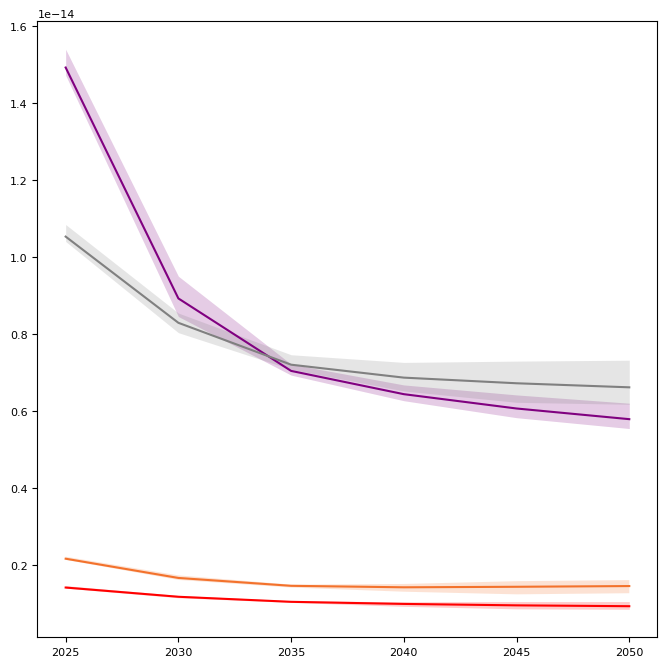

In [23]:
cate=1
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(2025:5:2050,h[cate,1,:],color="purple")
ax.fill_between(2025:5:2050,y1=hmin[cate,1,:],y2=hmax[cate,1,:],alpha=0.2,linewidth=0,color="purple")
ax.plot(2025:5:2050,h[cate,2,:])
ax.fill_between(2025:5:2050,y1=hmin[cate,2,:],y2=hmax[cate,2,:],alpha=0.2,linewidth=0)

ax.plot(2025:5:2050,h[cate,3,:],color="grey")
ax.fill_between(2025:5:2050,y1=hmin[cate,3,:],y2=hmax[cate,3,:],alpha=0.2,linewidth=0,color="grey")

ax.plot(2025:5:2050,h[cate,4,:],color="red")
ax.fill_between(2025:5:2050,y1=hmin[cate,4,:],y2=hmax[cate,4,:],alpha=0.2,linewidth=0,color="red")
display(plt.gcf())
plt.close("all")


## **1.3 Stochastic run**

In [80]:
N=500
h = zeros(size(Q,1),length(processes),6,N);


In [ ]:
∇


In [81]:
for n in 1:N
    for y in 1:6
        h[:,:,y,n]=(Q[:,:,y]*rand.(δ𝐁°)[:,:,y]*s[:,:,y])*1e10
    end
end


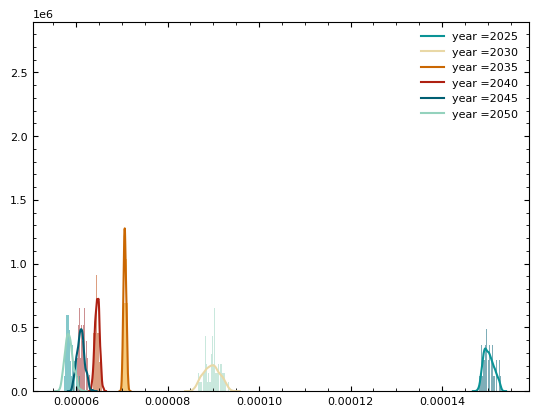

In [83]:
cate=1
fig, ax = plt.subplots()
for y in 1:6
    # colors=["grey","red","blue","purple","green","orange",]
    ax.hist(h[cate,1,y,:], bins=300,density=true, alpha=0.5)
    kd = kde(h[cate,1,y,:])
    ax.plot(kd.x, kd.density,label="year =$(2020+5*y)")
end
ax.legend(frameon=false)
display(plt.gcf())
plt.close("all")
